In [32]:
# coding:utf-8
import sys
import os
os.chdir(r"C:\Users\kuido\Downloads")
# 读取三体全集文本

santi_text = open(r"C:\Users\kuido\Downloads\santi_1_Eng.txt").read()
with open(r"C:\Users\kuido\Downloads\santi_1_Eng.txt", 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')


santi_text = open(r"C:\Users\kuido\Downloads\santi_1_Chn.txt").read()



santi_text



'文化大革命如火如荼进行的同时，军方探寻外星文明的绝秘计划“红岸工程”取得了突破性进展。但在按下发射键的那一刻，历经劫难的叶文洁没有意识到，她彻底改变了人类的命运。\n地球文明向宇宙发出的第一声啼鸣，以太阳为中心，以光速向宇宙深处飞驰……\n\n\n\n四光年外，“三体文明”正苦苦挣扎——三颗无规则运行的太阳主导下的百余次毁灭与重生逼迫他们逃离母星。而恰在此时，他们接收到了地球发来的信息。\n在运用超技术锁死地球人的基础科学之后，三体人庞大的宇宙舰队开始向地球进发……人类的末日悄然来临。\n\n \n目\u3000录 \n\n\n\n\n            前 言 \n            1.\u3000疯狂年代 \n            2.\u3000寂静的春天 \n            3.\u3000红岸之一 \n            4.\u3000三十八年后·科学边界 \n            5.\u3000台球 \n            6.\u3000射手和农场主 \n            7.\u3000三体、周文王、长夜 \n            8.\u3000叶文洁 \n            9.\u3000宇宙闪烁 \n            10.\u3000大史 \n            11.\u3000三体·墨子·烈焰 \n            12.\u3000红岸之二 \n            13.\u3000红岸之三 \n            14.\u3000红岸之四 \n            15.\u3000三体、哥白尼、宇宙橄榄球、三日凌空 \n            16.\u3000三体问题 \n            17.\u3000三体、牛顿、冯·诺依曼、秦始皇、三日连珠 \n            18.\u3000聚会 \n            19.\u3000三体、爱因斯坦、单摆、大撕裂 \n            20.\u3000三体、远征 \n            21.\u3000地球叛军 \n            22.\u3000红岸之五 \n            23.\u3000红岸之六 \n            24.\u3000叛乱 

In [25]:
text=santi_text
text_without_newlines = text.replace('\n', '')

# Measure the length of the text without newline characters
length_without_newlines = len(text_without_newlines)

print("Original text:", repr(text))
print("Length without newlines:", length_without_newlines)

Original text: "\nLIST OF CHARACTERS\n\nChinese names are written with surname first.\n\nThe Ye Family\n\n\n\nYe Zhetai\n\nPhysicist, professor at Tsinghua University\n\n\n\nShao Lin\n\nPhysicist, Ye Zhetai’s wife\n\n\n\nYe Wenjie\n\nAstrophysicist, daughter of Ye Zhetai\n\n\n\nYe Wenxue\n\nYe Wenjie’s sister, a Red Guard\n\n\n\nRed Coast Base\n\n\n\nLei Zhicheng\n\nPolitical commissar at Red Coast Base\n\n\n\nYang Weining\n\nChief engineer at Red Coast Base, once a student of Ye Zhetai\n\n\n\nThe Present\n\n\n\nYang Dong\n\nString theorist and daughter of Ye Wenjie and Yang Weining\n\n\n\nDing Yi\n\nTheoretical physicist, Yang Dong’s boyfriend\n\n\n\nWang Miao\n\nNanomaterials researcher\n\n\n\nShi Qiang\n\nPolice detective, nicknamed Da Shi\n\n\n\nChang Weisi\n\nMajor-general of the People’s Liberation Army\n\n\n\nShen Yufei\n\nJapanese physicist and member of the Frontiers of Science\n\n\n\nWei Cheng\n\nMath prodigy and recluse, Shen Yufei’s husband\n\n\n\nPan Han\n\nBiologist, frie

In [17]:
import jieba.posseg as psg

# 将三体全集文本分词，并附带上词性，因为数据量比较大，防止每次运行脚本都花大量时间，所以第一次分词后就将结果存入文件out.txt中
# 相当于做一个缓存，格式为每个词占一行，每一行的内容为：
# 词    词性
santi_words_with_attr = [(x.word,x.flag) for x in psg.cut(santi_text) if len(x.word) >= 2]  # 这里的x.word为词本身，x.flag为词性
print (len(santi_words_with_attr))
with open('out.txt','w+') as f:
    for x in santi_words_with_attr:
        f.write('{0}\t{1}\n'.format(x[0],x[1]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\kuido\AppData\Local\Temp\jieba.cache
Loading model cost 0.915 seconds.
Prefix dict has been built successfully.


59553


In [18]:
# 从out.txt中读取带词性的分词结果列表
santi_words_with_attr = []
with open('out.txt','r') as f:
    for x in f.readlines():
        pair = x.split()
        if len(pair) < 2:
            continue
        santi_words_with_attr.append((pair[0],pair[1]))

# 将分词列表的词性构建成一个字典，以便后面使用，格式为：
# {词:词性}
attr_dict = {}
for x in santi_words_with_attr:
    attr_dict[x[0]] = x[1]

# 要过滤掉的词性列表，这些词性的词都是没有实际意义的词，如连词、代词等虚词，这个列表初始化为空列表，后面根据分析结果手工往里面一个个添加
stop_attr = []

# 获取过滤掉stop_attr里的词性的词后的分词列表
words = [x[0] for x in santi_words_with_attr if x[1] not in stop_attr]

#　统计在分词表中出现次数排名前500的词的列表，并将结果输出到文件most.txt中，每行一个词，格式为：
# 词,出现次数,词性
from collections import Counter
c = Counter(words).most_common(500)
with open('most.txt','w+') as f:
    for x in c:
        f.write('{0},{1},{2}\n'.format(x[0],x[1],attr_dict[x[0]]))

In [31]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
sns.set()

In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kuido\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [36]:
text= TextBlob(data)
my_list=text.tags

In [38]:
def get_top_words(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words, remove punctuation, and convert to lowercase
    words = re.findall(r'\b\w+\b', text.lower())

    # Count the occurrences of each word
    word_counts = Counter(words)

    # Get the top 10 words
    top_words = word_counts.most_common(50)

    return top_words

# Replace 'your_text_file.txt' with the actual path to your text file
text_file_path = r"C:\Users\kuido\Downloads\santi_1_Eng.txt"
top_words = get_top_words(text_file_path)

# Display the top 10 words
for word, count in top_words:
    print(f'{word}: {count}')

ef word_analysis(word_type):
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + word_type)
    df = pd.DataFrame(filtered)
    df.columns = ["Word", "Occurences"]
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(20, 'Occurences')
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

the: 9356
of: 3384
to: 2935
a: 2761
and: 2591
in: 1586
was: 1472
that: 1398
it: 1154
you: 1120
i: 1090
s: 1010
he: 979
had: 817
but: 769
as: 748
at: 727
this: 710
is: 706
on: 690
wang: 674
for: 667
t: 621
she: 617
her: 606
be: 593
with: 591
from: 582
his: 575
they: 555
ye: 526
by: 476
were: 475
we: 464
have: 455
one: 431
all: 422
not: 411
can: 388
like: 376
three: 354
up: 339
two: 339
would: 339
more: 333
said: 330
into: 328
out: 327
time: 319
only: 316


In [43]:
def word_analysis(word_type):
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + word_type)
    df = pd.DataFrame(filtered)
    df.columns = ["Word", "Occurences"]
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(20, 'Occurences')
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

filtered for NN


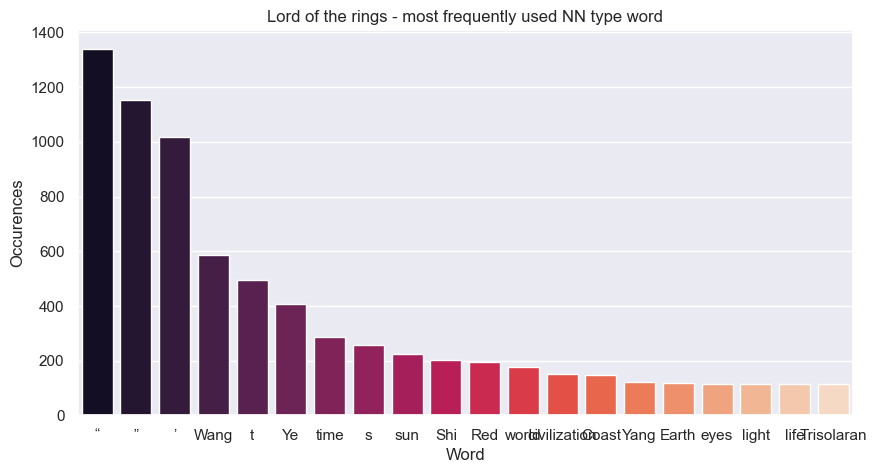

In [45]:
word_analysis('')

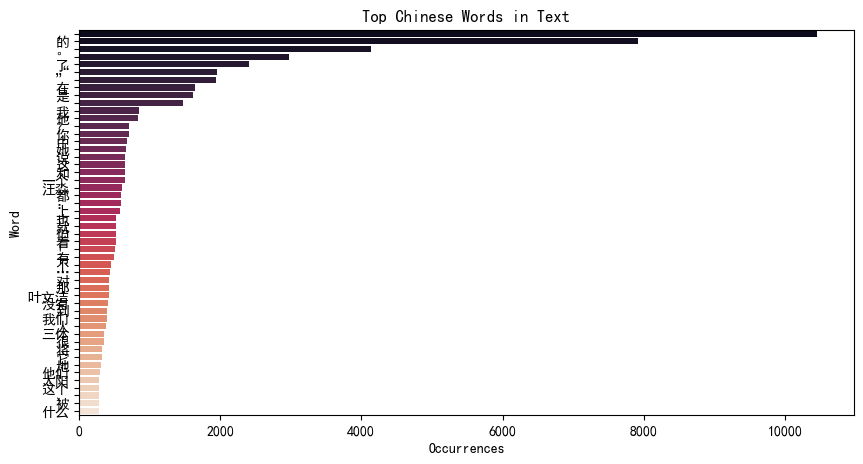

In [9]:

import jieba
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def get_top_words(file_path, num_words=50):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Use jieba to tokenize the Chinese text
    words = jieba.lcut(text)

    # Count the occurrences of each word
    word_counts = Counter(words)

    # Get the top words
    top_words = word_counts.most_common(num_words)

    return top_words

# Replace with the actual path to your text file
text_file_path =r"C:\WM\340 Final Project\Text\SanTi01.txt"
top_words = get_top_words(text_file_path)

# Visualization
plt.figure(figsize=(10, 5))
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Occurrences'])
sns.barplot(x="Occurrences", y="Word", palette="rocket", data=top_words_df).set_title("Top Chinese Words in Text")
plt.show()


In [15]:
data=pd.read_csv(r'C:\WM\340 Final Project\DataSet\Occurence.csv')


,Word,Occurence_CHN,Translation,Eng_Word,Occurence_ENG
0,汪淼,642,Wang Miao,Wang,674
1,叶文洁,447,Ye WenJie,Ye,565
2,三体,336,Three Body/Trisolaran,time,423
3,太阳,291,Sun,sun,349
4,文明,271,Civilization,Red,242
5,世界,253,World,Shi,219
6,宇宙,215,Universe,World,201
7,地球,206,Earth,civilization,183
8,红岸,153,Red Coast,Coast,153
9,科学,124,Science,Yang,134


C:\Users\kuido\AppData\Local\Temp\ipykernel_14460\3716670509.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


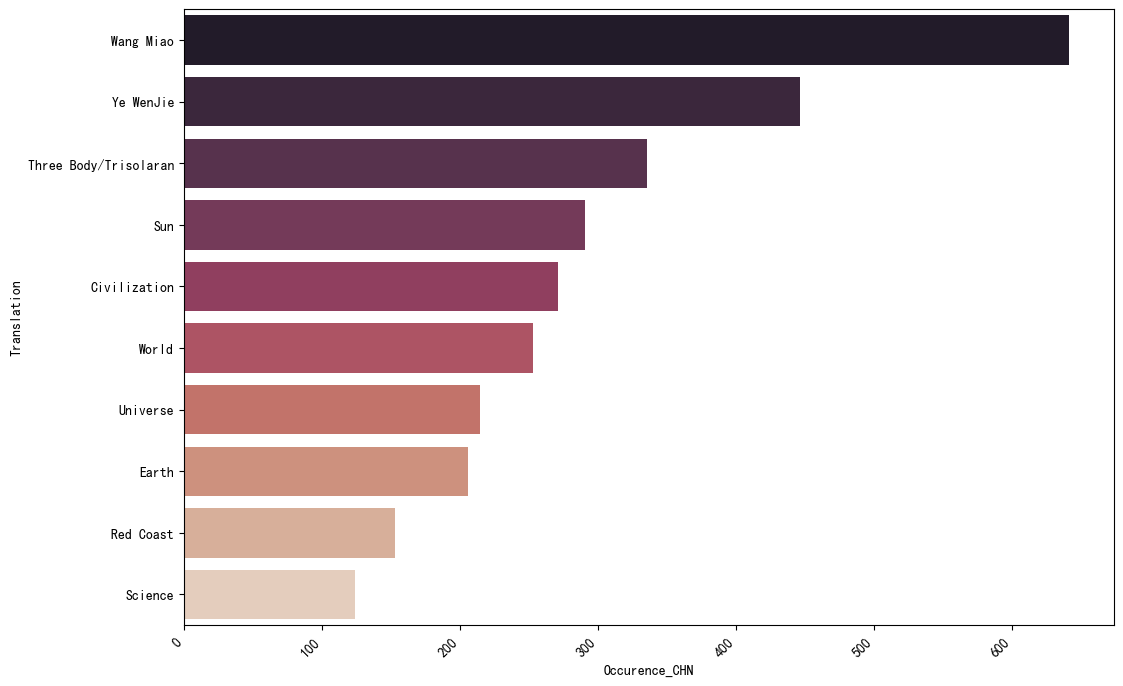

<Figure size 640x480 with 0 Axes>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))  # You can adjust these numbers as needed

# Plot the barplot
barplot = sns.barplot(
    x="Occurence_CHN",
    y="Translation",
    palette="rocket",
    saturation=0.5,  # A value of 1 is fully saturated; 0 would be no color
    data=data
)

# Rotate the x-tick labels if necessary
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Decrease the font size of the labels if necessary
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()
plt.savefig('Chinese_Top10_words.jpg')

C:\Users\kuido\AppData\Local\Temp\ipykernel_14460\3341858048.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


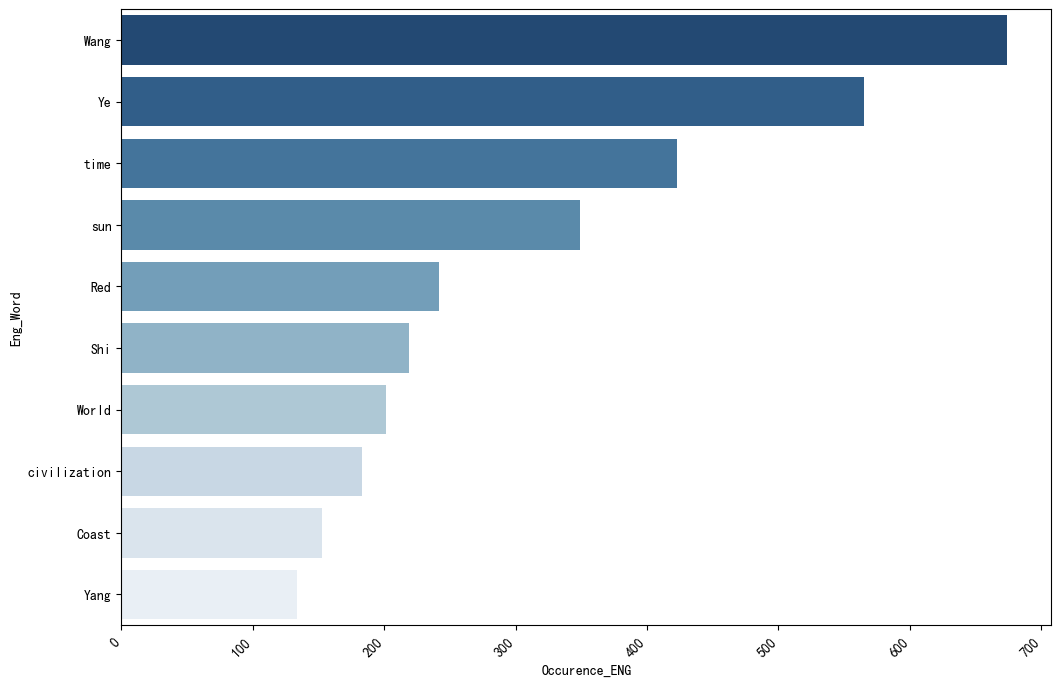

In [27]:
plt.figure(figsize=(12, 8))  # You can adjust these numbers as needed

# Plot the barplot
barplot = sns.barplot(
    x="Occurence_ENG",
    y="Eng_Word",
    palette="Blues_r",
    saturation=0.6,  # A value of 1 is fully saturated; 0 would be no color
    data=data
)

# Rotate the x-tick labels if necessary
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Decrease the font size of the labels if necessary
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()